(391, 400, 3)


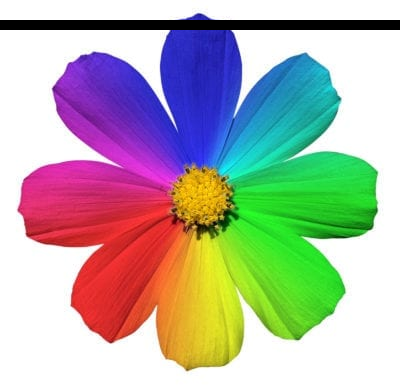

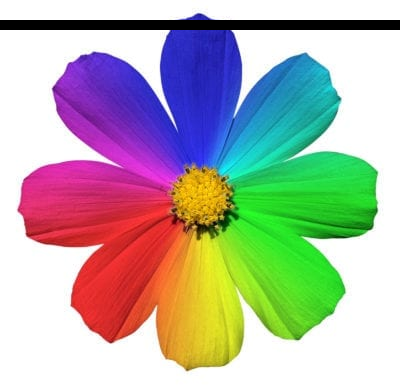

In [4]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

file1 = files.upload()
img1 = cv2.imread("flower.jpg") #"flower.jpg"는 업로드하는 이미지 파일명으로 수정 필요
print(img1.shape)
img1[20:30][:][:] = 0
cv2_imshow(img1)

height, width, channel = img1.shape
copy_img = np.zeros(shape=(height, width, channel), dtype=np.uint8)
for y in range(height):
    for x in range(width):
        copy_img[y][x][0] = img1[y][x][0]
        copy_img[y][x][1] = img1[y][x][1]
        copy_img[y][x][2] = img1[y][x][2]

cv2_imshow(copy_img)


In [ ]:
print(img1.shape)

(391, 400, 3)


In [ ]:
# 히스토그램 역투영 예제

# 관련 라이브러리 선언
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 영상 읽기
file1 = files.upload()
from google.colab import files
img1 = cv2.imread("img1.jpg", cv2.IMREAD_UNCHANGED)
#img1 = cv2.imread("img1.jpg", cv2.IMREAD_GRAYSCALE)
#img1 = cv2.imread("img1.jpg", cv2.IMREAD_COLOR)

#height, width, channel = img1.shape
#resized_img1 = cv2.resize(img1, (width, height))
#cv2_imshow(resized_img1)

# 컬러 공간 변환 및 채널 분할
img1_HSV = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
img1_H, img1_S, img1_V = cv2.split(img1_HSV)

# 입력 히스토그램 생성
mask_y1 = 130; mask_y2 = 170; mask_x1 = 160; mask_x2 = 200 
ch1 = [0]; ranges1 = [0, 256]; histSize1 = [256]; bin_x1 = np.arange(256)
mask1 = img1_H[mask_y1:mask_y2, mask_x1:mask_x2]
hist_mask = cv2.calcHist([mask1], ch1, None, histSize1, ranges1)

# 히스토그램 역투영 수행
bp = cv2.calcBackProject([img1_H], ch1, hist_mask, ranges1, 1)

# 결과영상
ret1, res1 = cv2.threshold(bp, 0, 255, cv2.THRESH_BINARY)
mask2 = np.full(shape=img1.shape, fill_value=0, dtype=np.uint8)
mask2[:,:,0] = res1; mask2[:,:,1] = res1; mask2[:,:,2] = res1
res2 = cv2.bitwise_and(img1, mask2)

cv2.rectangle(img1, (mask_x1, mask_y1), (mask_x2, mask_y2), (255, 255, 255), 2)
cv2_imshow(img1)
print("\n")
cv2_imshow(res1)
print("\n")
cv2_imshow(res2)

hist_Hue = cv2.calcHist([img1_H], ch1, None, histSize1, ranges1)
hist_res = cv2.calcHist([bp], ch1, None, histSize1, ranges1)
displays = [("Input Histogram", hist_Hue, 0, np.arange(256), 1),
            ("Mask Histogram", hist_mask, 0, np.arange(256), 2),
            ("Res Histogram", hist_res, 1, np.arange(255), 3)]

for (name, out, hist_index, hist_bins, index) in displays:
    plt.figure(index)
    plt.title(name); plt.xlabel("Bin"); plt.ylabel("Frequency")
    plt.bar(hist_bins, out[hist_index:, 0], width=6, color='g')
    plt.grid(True, lw=1, ls='--', c='.75')
    plt.xlim([0, 255])

plt.show()

NameError: ignored